In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

np.random.seed(29)


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

plt.rc('axes.spines', top=False, right=False)
plt.rc('figure', figsize=(9, 6))

def simulation_example1(sums_by_trial):
    freq, bins = np.histogram(sums_by_trial, bins=range(2, 21))
    freq = freq / freq.sum() # raw number -> percent
    plt.bar(bins[:-1], freq, width=1, color='white', edgecolor='black')
    plt.bar(bins[-8:-1], freq[-7:], width=1, color='lightblue', edgecolor='black')

    plt.xticks(range(3, 19))
    plt.ylabel('% of the time we get this sum')
    plt.xlabel('Sum of rolls')

    num_rolls = '{:,}'.format(len(sums_by_trial))
    plt.title(f'Sum of 3 dice rolls based on {num_rolls} simulations')
    plt.xlim(1, 23)
    plt.annotate('', xy=(13, .11), xytext=(18, .11), xycoords='data',
                 textcoords='data', arrowprops={'arrowstyle': '|-|'})
    plt.text(14.5, .12, 'P(X > 12)', ha='left', va='center')

def simulation_example2(naps):
    f, bins = np.histogram(naps.sum(axis=1), bins=[0, 1, 2, 3])

    f = f / f.sum()

    plt.bar(bins[:-1], f, width=1, color='lightskyblue', edgecolor='black')
    plt.xticks([0, 1, 2])
    plt.xlabel('# of naps taken')
    plt.ylabel('% of time this outcome occurs')
    plt.title('Results of 10,000 simulations of toddler naps over a weekend')

def distributions_example1(die_distribution):
    x = [1, 2, 3]
    y = die_distribution.pmf(x)
    plt.bar(x, y, width=1, color='papayawhip', edgecolor='black')

    x = [4, 5, 6]
    y = die_distribution.pmf(x)
    plt.bar(x, y, width=1, color='white', edgecolor='black')

    plt.title('P(X <= 3) = 0.5')
    plt.ylabel('P(X = x)')
    plt.xlabel('x')

def distributions_example2(die_distribution):
    x = [1, 2, 3, 4]
    y = die_distribution.pmf(x)
    plt.bar(x, y, width=1, color='white', edgecolor='black')

    x = [5, 6]
    y = die_distribution.pmf(x)
    plt.bar(x, y, width=1, color='papayawhip', edgecolor='black')

    plt.title('P(X > 4) = {:.3f}'.format(die_distribution.sf(4)))
    plt.ylabel('P(X = x)')
    plt.xlabel('x')

def distributions_example3():
    n = 30
    p = .25

    x = np.arange(0, 21)
    pmf_x = stats.binom(n, p).pmf(x)
    cdf_x = stats.binom(n, p).cdf(x)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    ax1.bar(x, pmf_x, width=1, edgecolor='black', color='white')
    ax1.set_ylabel('$P(X = x)$')
    ax1.set_xticks(range(21))
    ax1.set_title('Probability Mass Function')

    ax2.bar(x, cdf_x, width=1, color='white', edgecolor='black')
    ax2.set_title('Cumulative Density Function')
    ax2.set_ylabel('$P(X \leq x)$')
    ax2.set_xticks(range(21))
    ax2.set_xlabel('x')

def distributions_example4():
    plt.figure(figsize=(8, 5))

    x1 = np.arange(0, 11)
    y1 = stats.binom(30, .25).pmf(x1)
    plt.bar(x1, y1, width=1, edgecolor='black', color='white')

    x2 = np.arange(11, 31)
    y2 = stats.binom(30, .25).pmf(x2)
    plt.bar(x2, y2, width=1, edgecolor='black', color='darkseagreen')

    plt.title('Binomial Distribution with n=30, p=.25')
    plt.ylabel('pmf(x)')
    plt.xlabel('x')

    plt.annotate('', xy=(11, .07), xytext=(30, .07), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '|-|'})
    plt.text(20, .08, 'P(X > 10)', ha='center', va='center')

def distributions_example5():
    x = np.arange(1, 21)
    y = stats.binom(20, .05).pmf(x)
    plt.bar(x, y, width=1, edgecolor='black', color='white')

    plt.bar(0, stats.binom(20, .05).pmf(0), width=1, color='darkseagreen', edgecolor='black')
    plt.title('Binomial Distribution for n=20, p=.05')
    plt.xlabel('x')
    plt.ylabel('pmf(x)')

    plt.annotate('$P(X = 0) = {:.3f}$'.format(stats.binom(20, .05).pmf(0)),
                 (0, stats.binom(20, .05).pmf(0)), xytext=(5, .25),
                 arrowprops={'arrowstyle': '->'})

def distributions_example6():
    n = 1000

    plt.figure(figsize=(16, 10))

    for i, p in enumerate([0.1, 0.5, 0.75, 0.9]):
        plt.subplot(2, 2, i + 1)
        x = stats.binom.rvs(size=n, p=p, n=10)
        plt.hist(x, width=1, bins=range(12), edgecolor='black', align='left')
        plt.title(f'{n:,} samples from p={p}, n=10')
        plt.xticks(range(12))
        plt.xlabel('Number of Successes in 10 trials')
        plt.ylabel('')

def distributions_example7(μ, σ):
    sales = stats.norm(μ, σ)
    top_10_percent_cutoff = sales.ppf(.9)
    x = np.arange(μ - 4*σ, μ + 4*σ, 100)
    y = sales.pdf(x)

    plt.plot(x, y, color='black')
    plt.vlines([μ, sales.ppf(.9)], 0, [sales.pdf(μ), sales.pdf(sales.ppf(.9))], linestyle=':')
    plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

    x1 = np.arange(top_10_percent_cutoff, μ + 4*σ)
    y1 = sales.pdf(x1)

    plt.fill_between(x1, y1, color='darkseagreen')

    plt.annotate(f'${top_10_percent_cutoff:,.2f}', (top_10_percent_cutoff, sales.pdf(top_10_percent_cutoff)),
                 xytext=(15000, .0001), arrowprops={'arrowstyle': '->'})
    plt.annotate(f'Top 10% of Sales', (15500, .000025), xytext=(15500, .00005), arrowprops={'arrowstyle': '->'})
    plt.annotate(f'Average Sales, ${μ:,.2f}', (μ, sales.pdf(μ)), xytext=(13300, .00018), arrowprops={'arrowstyle': '->'})

    plt.ylabel('P(X = x)')
    plt.xlabel('x')

def distributions_example8():
    n = 10_000

    plt.figure(figsize=(12, 9))
    plt.suptitle(f'Normal Distribution, {n:,} simulations')
    colors = ['blue', 'red', 'green', 'orange']
    for i, vals in enumerate([(50, 10), (100, 20), (100, 40), (150, 50)]):
        mu, sigma = vals
        x = stats.norm.rvs(size=n, loc=mu, scale=sigma)
        sns.distplot(x, color=colors[i], label=f'$\mu$={mu}, $\sigma$={sigma}')

    plt.xlabel('x')
    plt.legend()

def distributions_example10():
    x = range(16)
    y = stats.poisson(5).pmf(x)

    plt.figure(figsize=(9, 6))
    plt.bar(x, y, edgecolor='black', color='white', width=1)
    plt.xticks(x)
    plt.ylabel('P(X = x)')
    plt.xlabel('lbs of coffee consumed')
    plt.bar(3, stats.poisson(5).pmf(3), width=1, color='darkseagreen', edgecolor='black')
    plt.annotate(f'P(X = 3) = {stats.poisson(5).pmf(3):.3f}', (3, stats.poisson(5).pmf(3)),
                 xytext=(7, .16), arrowprops={'arrowstyle': '->'})

def distributions_example11():
    x = range(16)
    y = stats.poisson(5).pmf(x)

    plt.figure(figsize=(9, 6))
    plt.bar(x, y, edgecolor='black', color='white', width=1)
    plt.xticks(x)
    plt.ylabel('P(X = x)')
    plt.xlabel('lbs of coffee consumed')

    x1 = range(8, 16)
    y1 = stats.poisson(5).pmf(x1)

    plt.bar(x1, y1, width=1, color='darkseagreen', edgecolor='black')
    # plt.annotate(f'P(X = 3) = {stats.poisson(5).pmf(3)}', (3, stats.poisson(5).pmf(3)),
    #              xytext=(7, .16), arrowprops={'arrowstyle': '->'})

    plt.annotate('', xy=(8, .08), xytext=(15, .08), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '<|-'})
    plt.text(11.5, .09, 'P(X > 7)', va='center', ha='center')

def distributions_example12():
    plt.figure(figsize=(13, 10))

    n = 10_000

    plt.suptitle(f'Poisson Distribution, {n:,} simulations')
    all_bins = [[0, 7], [0, 21], [0, 21], [60, 140, 10]]
    for i, mu in enumerate([1, 5, 10, 100]):
        plt.subplot(2, 2, i + 1)
        x = stats.poisson(mu).rvs(n)
        bins = all_bins[i]
        plt.hist(x, bins=range(*bins), align='left', edgecolor='black', color='white')
        plt.title(f'$\mu$={mu}')
        plt.xlabel('Number of events') if i > 1 else None
        plt.ylabel('')

def compare_means_example1(df):
    def pdf(x):
        return stats.t(degf).pdf(x)

    lefties = df[df.handedness == 'left']

    μ = df.exam_score.mean()
    xbar = lefties.exam_score.mean()
    s = lefties.exam_score.std()
    n = lefties.shape[0]
    degf = n - 1
    standard_error = s / sqrt(n)

    t = (xbar - μ) / (s / sqrt(n))

    x = np.linspace(-4, 4)
    y = pdf(x)
    x_fill = np.linspace(t, 4)
    y_fill = pdf(x_fill)
    x_fill_neg = np.linspace(-4, -t)
    y_fill_neg = pdf(x_fill_neg)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.ylim(0, .5)

    plt.fill_between(x_fill, y_fill, color='yellow')
    plt.fill_between(x_fill_neg, y_fill_neg, color='yellow')

    plt.vlines([0, t, -t], 0, [pdf(0), pdf(t), pdf(-t)], linestyles=':')

    plt.annotate('$H_0: t = 0$', (0, pdf(0)), xytext=(-.5, .45), arrowprops={'facecolor': 'blue'})
    plt.annotate(f'$t = {t:.3f}$', (t, pdf(t)), xytext=(1, .35), arrowprops={'facecolor': 'yellow'})
    plt.annotate(f'$t = -{t:.3f}$', (-t, pdf(-t)), xytext=(-2, .35), arrowprops={'facecolor': 'yellow'})

def compare_means_example2(df):
    def pdf(x):
        return stats.t(degf).pdf(x)

    x1 = df[df.study_strategy == 'flashcards'].exam_score
    x2 = df[df.study_strategy != 'flashcards'].exam_score

    xbar1 = x1.mean()
    xbar2 = x2.mean()

    n1 = x1.shape[0]
    n2 = x2.shape[0]

    s1 = x1.std()
    s2 = x2.std()

    degf = n1 + n2 - 2

    s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    s_p

    standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

    t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
    t

    x = np.linspace(-6, 6)
    y = pdf(x)
    x_fill = np.linspace(t, 6)
    y_fill = pdf(x_fill)
    x_fill_neg = np.linspace(-6, -t)
    y_fill_neg = pdf(x_fill_neg)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.ylim(0, .5)

    plt.fill_between(x_fill, y_fill, color='yellow')
    plt.fill_between(x_fill_neg, y_fill_neg, color='yellow')

    plt.vlines([0, t, -t], 0, [pdf(0), pdf(t), pdf(-t)], linestyles=':')

    plt.annotate('$H_0: t = 0$', (0, pdf(0)), xytext=(-.5, .45), arrowprops={'facecolor': 'blue'})
    plt.annotate(f'$t = {t:.3f}$', (t, pdf(t)), xytext=(4, .06), arrowprops={'facecolor': 'yellow'})
    plt.annotate(f'$t = -{t:.3f}$', (-t, pdf(-t)), xytext=(-4, .06), arrowprops={'facecolor': 'yellow'})

# ## More Hypothesis Testing Examples ###

tips = sns.load_dataset('tips')

def more_examples_example1():
    plt.figure(figsize=(9, 6))
    r, p = stats.pearsonr(tips.total_bill, tips.tip)
    plt.scatter(tips.total_bill, tips.tip, c='green', alpha=.7)
    plt.ylabel('Tip Amount')
    plt.xlabel('Total Bill')
    plt.title('Total Bill vs Tip Amount')
    plt.text(12, 8, f'r = {r:.3f}')

def more_examples_example2():
    plt.figure(figsize=(9, 6))
    smokers_total_bills = tips[tips.smoker == 'Yes'].total_bill
    overall_total_bill_mean = tips.total_bill.mean()

    smoker_bill_mean = smokers_total_bills.mean()

    plt.bar(['Smoker Avg', 'Overall Avg'], [smoker_bill_mean, overall_total_bill_mean], color='purple')
    plt.ylabel('Bill Amount ($)')
    plt.ylim(0, tips.total_bill.max())
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.text(0, 16, f'${smoker_bill_mean:.2f}', horizontalalignment='center', color='white')
    plt.text(1, 15, f'${overall_total_bill_mean:.2f}', horizontalalignment='center', color='white')

    plt.annotate(f'Highest Bill, ${tips.total_bill.max():.2f}', (.2, 50),
                 xytext=(.5, 40), arrowprops={'facecolor': 'blue'})

    plt.hlines(tips.total_bill.max(), -.5, 1.5, linestyle=':')

def more_examples_example3():
    plt.figure(figsize=(9, 6))
    parties_of_2 = tips[tips['size'] == 2]
    parties_of_4 = tips[tips['size'] == 4]
    test_results = stats.ttest_ind(parties_of_2.tip, parties_of_4.tip)

    mean_2 = parties_of_2.tip.mean()
    mean_4 = parties_of_4.tip.mean()

    plt.bar(['Parties of 2', 'Parties of 4'], [mean_2, mean_4], color='purple')
    plt.ylabel('Tip Amount ($)')
    plt.ylim(0, tips.tip.max())

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.text(0, 1.5, f'${mean_2:.2f}', horizontalalignment='center', color='white')
    plt.text(1, 2, f'${mean_4:.2f}', horizontalalignment='center', color='white')

    plt.annotate(f'Highest Tip, ${tips.tip.max():.2f}', (.2, tips.tip.max()),
                 xytext=(.5, 8), arrowprops={'facecolor': 'blue'})
    plt.annotate(f'Average Tip, ${tips.tip.mean():.2f}', (1.5, tips.tip.mean()),
                 xytext=(1.5, 6), arrowprops={'facecolor': 'blue'})

    plt.hlines([tips.tip.mean(), tips.tip.max()], -.5, 1.5, linestyle='--')

In [47]:
n_trials = nrows = 10_000
n_dice = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls


array([[2, 6, 1],
       [5, 2, 3],
       [3, 4, 2],
       ...,
       [4, 4, 3],
       [6, 5, 3],
       [5, 3, 4]])

In [48]:
sums_by_trial = rolls.sum(axis=1)
sums_by_trial

array([ 9, 10,  9, ..., 11, 14, 12])

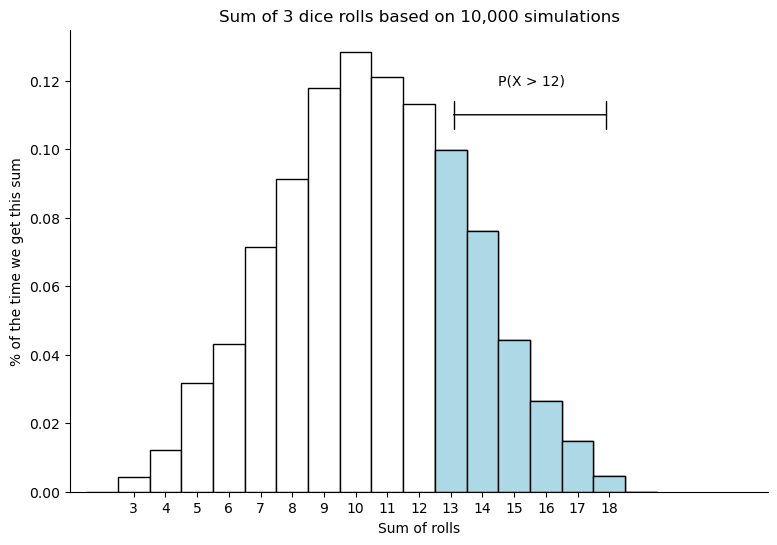

In [49]:
simulation_example1(sums_by_trial)


In [77]:
wins = sums_by_trial > 12
wins

array([False, False, False, ..., False,  True, False])

In [66]:
win_rate = wins.astype(int).mean()
win_rate

0.2658

In [78]:
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

-1.0130000000000003

In [85]:
wins = sums_by_trial >= 12
win_rate = wins.astype(int).mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit




0.6820000000000004

In [86]:
p_nap = .3
ndays = ncols = 2
n_simulated_weekends = nrows = 10**5

In [88]:
data = np.random.random((nrows, ncols))
data

array([[0.90614173, 0.44714124],
       [0.66312255, 0.12460583],
       [0.02276447, 0.37916431],
       ...,
       [0.06948107, 0.21354849],
       [0.04984332, 0.35838993],
       [0.49342271, 0.52522849]])

In [89]:
naps = data < p_nap
naps


array([[False, False],
       [False,  True],
       [ True, False],
       ...,
       [ True,  True],
       [ True, False],
       [False, False]])

In [90]:
naps.sum(axis=1)

array([0, 1, 1, ..., 2, 1, 0])

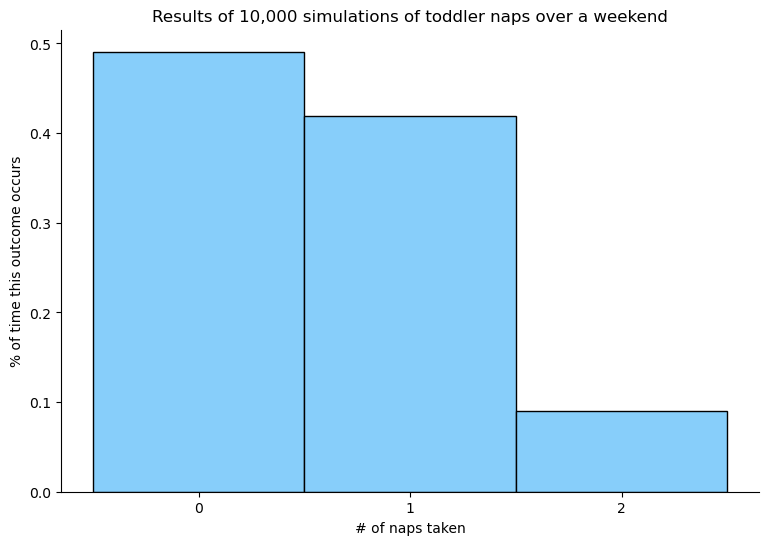

In [92]:
simulation_example2(naps)


In [93]:
(naps.sum(axis=1) >= 1).mean()


0.5092

In [94]:
(naps.sum(axis=1) == 0).mean()


0.4908

In [95]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)

(pd.DataFrame(rolls)
 .apply(lambda row: 3 in row.values, axis=1)
 .mean())


0.42164